In [1]:
# Import dependancies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [11]:
# Import csv file containing current employees by job title
current_employee_nums = pd.read_csv("total_staff_by_title.csv")
current_employee_nums["Status"] = "Current"
current_employee_nums = current_employee_nums.sort_values("title")
current_employee_nums

,count,title,Status
4,12057,Assistant Engineer,Current
0,84467,Engineer,Current
6,24,Manager,Current
3,23986,Senior Engineer,Current
1,82022,Senior Staff,Current
2,25520,Staff,Current
5,12048,Technique Leader,Current


In [12]:
# Import csv file containing number of retired employees by job title
retiring_employee_nums = pd.read_csv("retiring_titles.csv")
retiring_employee_nums["Status"] = "Retiring"
retiring_employee_nums = retiring_employee_nums.sort_values("title")
retiring_employee_nums

,count,title,Status
5,1761,Assistant Engineer,Retiring
2,14222,Engineer,Retiring
6,2,Manager,Retiring
0,29414,Senior Engineer,Retiring
1,28254,Senior Staff,Retiring
3,12243,Staff,Retiring
4,4502,Technique Leader,Retiring


In [13]:
# Import csv file containing current employees eligible for mentorship job title
mentorship_employee_nums = pd.read_csv("mentorship_titles.csv")
mentorship_employee_nums["Status"] = "Mentorship"
mentorship_employee_nums = mentorship_employee_nums.sort_values("title")
mentorship_employee_nums

,count,title,Status
4,78,Assistant Engineer,Mentorship
1,501,Engineer,Mentorship
2,169,Senior Engineer,Mentorship
0,569,Senior Staff,Mentorship
3,155,Staff,Mentorship
5,77,Technique Leader,Mentorship


In [14]:
# Concatenate the 3 imported DataFrames into one DataFrame for graphing relationship
employee_summary_df = pd.concat([current_employee_nums, retiring_employee_nums, mentorship_employee_nums], ignore_index=True)
employee_summary_df

,count,title,Status
0,12057,Assistant Engineer,Current
1,84467,Engineer,Current
2,24,Manager,Current
3,23986,Senior Engineer,Current
4,82022,Senior Staff,Current
5,25520,Staff,Current
6,12048,Technique Leader,Current
7,1761,Assistant Engineer,Retiring
8,14222,Engineer,Retiring
9,2,Manager,Retiring


In [15]:
# Set style for Seaborn plot
sns.set(style="whitegrid", font="Arial")
# Create a color palette for the graph
pal = sns.color_palette(n_colors=3)

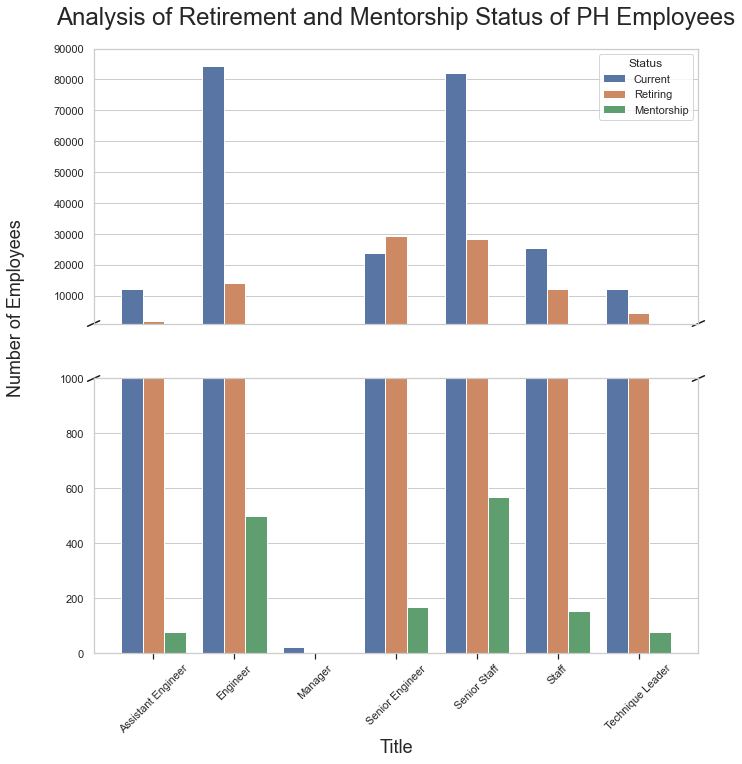

In [16]:
# Create a split plot based due to the wide range of data in the set
# Introduce the graph as 2 seperate graphs containing the whole of the data
# set with a split y axis to allow for varied axis scale based on the values
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2,
                             sharex=True, figsize=(12,12))

# Create bargraph with job title on the x axis and employee count on the y
# Adjust palette and define subplot
ax1 = sns.barplot(x='title', y='count',
                  hue='Status', data=employee_summary_df, palette=pal, ax=ax1)

# Repeat on lower plot
ax2 = sns.barplot(x='title', y='count',
                  hue='Status', data=employee_summary_df, palette=pal, ax=ax2)
# Set the x axis label and rotate categories 45 degrees
ax2.set_xlabel("Title", fontsize=18)
# Add title above top graph
ax1.set_title("Analysis of Retirement and Mentorship Status of PH Employees", fontsize=24, pad=24)
plt.xticks(rotation=45)
# Set limits for uper and lower graphs 
ax1.set_ylim(1000, 90000)
ax2.set_ylim(0, 1000)

# Remove upper axis as it is not needed 
ax1.get_xaxis().set_visible(False)

# Remove y labels from both graphs 
ax1.set_ylabel("")
ax2.set_ylabel("")
# Create a new label for the y axis that is centered between the two graphs
fig.text(0.05, 0.55, 'Number of Employees', va='center', rotation='vertical', fontsize=18)

# Add legend to the upper graph and remove from the lower
ax1.get_legend()
ax2.get_legend().remove()

# Add ticks to the top of the upper graph and bottom of the lower graph 
ax1.xaxis.tick_top()
ax2.xaxis.tick_bottom()

# Format the style
fig.subplots_adjust(left=0.15, right=0.85, bottom=0.15, top=0.85)

# Add hash marks were the plot breaks
# how big to make the diagonal lines in axis coordinates
d = .01  

# Create hash marks on upper axis
# Must be done on each plot individually, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
# Create the top-left diagonal
ax1.plot((-d, +d), (-d, +d), **kwargs) 
# Create the top-right diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  

# Add hash marks to the bottom axes
kwargs.update(transform=ax2.transAxes)
# Create the bottom-left diagonal
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
# Create bottom-right diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  

plt.show()

# Split Graph created based on github repo https://gist.github.com/pfandzelter/0ae861f0dee1fb4fd1d11344e3f85c9e

In [20]:
# Import csv file containing current employees eligable for retirement by job title
current_retirement_nums = pd.read_csv("Current_retirement_titles.csv")
current_retirement_nums["Status"] = "Retirement Eligible"
current_retirement_nums = current_retirement_nums.sort_values("title")
current_retirement_nums

,count,title,Status
4,3654,Assistant Engineer,Retirement Eligible
0,25332,Engineer,Retirement Eligible
6,6,Manager,Retirement Eligible
3,7305,Senior Engineer,Retirement Eligible
1,24926,Senior Staff,Retirement Eligible
2,7634,Staff,Retirement Eligible
5,3601,Technique Leader,Retirement Eligible


In [21]:
# Concatenate the 3 imported DataFrames into one DataFrame for graphing relationship
current_employee_summary_df = pd.concat([current_employee_nums, current_retirement_nums, mentorship_employee_nums], ignore_index=True)
current_employee_summary_df

,count,title,Status
0,12057,Assistant Engineer,Current
1,84467,Engineer,Current
2,24,Manager,Current
3,23986,Senior Engineer,Current
4,82022,Senior Staff,Current
5,25520,Staff,Current
6,12048,Technique Leader,Current
7,3654,Assistant Engineer,Retirement Eligible
8,25332,Engineer,Retirement Eligible
9,6,Manager,Retirement Eligible


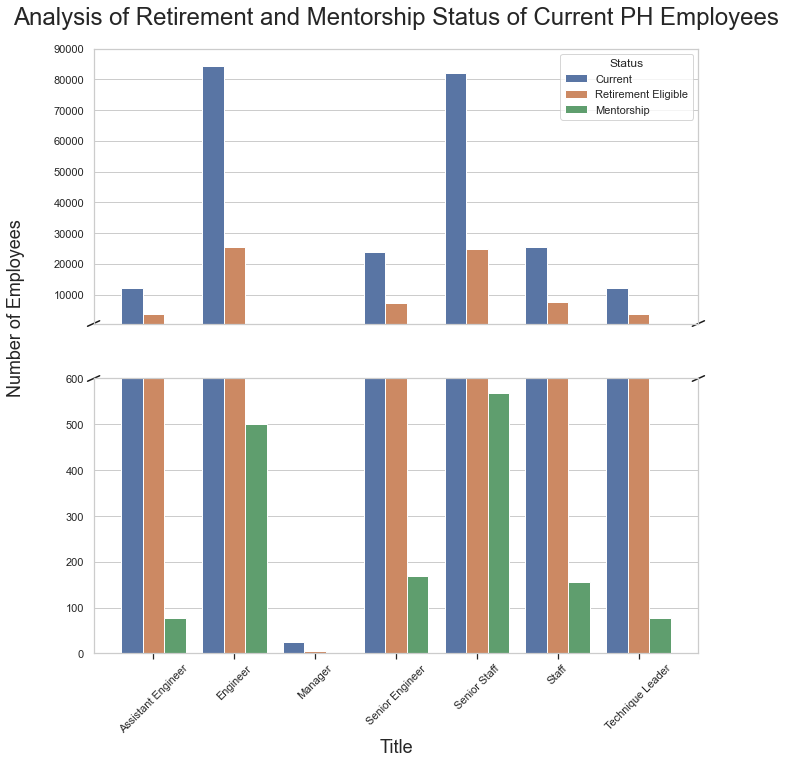

In [23]:
# Create a split plot based due to the wide range of data in the set
# Introduce the graph as 2 seperate graphs containing the whole of the data
# set with a split y axis to allow for varied axis scale based on the values
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2,
                             sharex=True, figsize=(12,12))

# Create bargraph with job title on the x axis and employee count on the y
# Adjust palette and define subplot
ax1 = sns.barplot(x='title', y='count',
                  hue='Status', data=current_employee_summary_df, palette=pal, ax=ax1)

# Repeat on lower plot
ax2 = sns.barplot(x='title', y='count',
                  hue='Status', data=current_employee_summary_df, palette=pal, ax=ax2)
# Set the x axis label and rotate categories 45 degrees
ax2.set_xlabel("Title", fontsize=18)
# Add title above top graph
ax1.set_title("Analysis of Retirement and Mentorship Status of Current PH Employees", fontsize=24, pad=24)
plt.xticks(rotation=45)
# Set limits for uper and lower graphs 
ax1.set_ylim(600, 90000)
ax2.set_ylim(0, 600)

# Remove upper axis as it is not needed 
ax1.get_xaxis().set_visible(False)

# Remove y labels from both graphs 
ax1.set_ylabel("")
ax2.set_ylabel("")
# Create a new label for the y axis that is centered between the two graphs
fig.text(0.05, 0.55, 'Number of Employees', va='center', rotation='vertical', fontsize=18)

# Add legend to the upper graph and remove from the lower
ax1.get_legend()
ax2.get_legend().remove()

# Add ticks to the top of the upper graph and bottom of the lower graph 
ax1.xaxis.tick_top()
ax2.xaxis.tick_bottom()

# Format the style
fig.subplots_adjust(left=0.15, right=0.85, bottom=0.15, top=0.85)

# Add hash marks were the plot breaks
# how big to make the diagonal lines in axis coordinates
d = .01  

# Create hash marks on upper axis
# Must be done on each plot individually, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
# Create the top-left diagonal
ax1.plot((-d, +d), (-d, +d), **kwargs) 
# Create the top-right diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  

# Add hash marks to the bottom axes
kwargs.update(transform=ax2.transAxes)
# Create the bottom-left diagonal
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
# Create bottom-right diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  

plt.show()

# Split Graph created based on github repo https://gist.github.com/pfandzelter/0ae861f0dee1fb4fd1d11344e3f85c9e